<a href="https://colab.research.google.com/github/4cea2/7506R-2C2023-GRUPO26/blob/main/7506R_TP2_GRUPO26_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo practico 2**
**Grupo**: 26

**Integrantes**:

Garcia, Nicolas

Vallcorba, Agustin

Carbajal Robles, Kevin Emir

## **Librerias y carga de dataset**

In [2]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0
!pip install xgboost
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorf

In [57]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import xgboost as xgb
import tensorflow as tf
import warnings
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import uniform
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import randint
from keras.callbacks import EarlyStopping

from tensorflow import keras

#configuración warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cargamos el dataset de entrenamiento y test.

In [4]:
#Dataset de entrenamiento
ds_train = pd.read_csv('sample_data/train.csv')

#Dataset de test
ds_test = pd.read_csv("sample_data/test.csv")

#Hacemos una copia del dataset de test
ds_test_copia = ds_test.copy()

## **Preprocesamiento**

In [ ]:
ds_train.dtypes

ID              int64
review_es      object
sentimiento    object
dtype: object

In [ ]:
ds_train.shape

(50000, 3)

In [ ]:
ds_train.head()

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [ ]:
ds_test.shape

(8599, 2)

In [ ]:
ds_test.head()

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."


Eliminamos los ID, ya que no nos seran necesarios al momento de entrenar los modelos.

In [5]:
ds_train = ds_train.drop('ID', axis=1)
ds_test = ds_test.drop('ID', axis=1)

## **Entrenamiento de modelos**

Para entrenar cada modelo, haremos una division del dataset de train.

Entrenaremos con un 70%, y dejaremos un 30% para testear.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
                                                    ds_train['review_es'],
                                                    ds_train['sentimiento'],
                                                    test_size=0.3,
                                                    random_state=25,
                                                    shuffle=True
                                                    )

In [ ]:
x_train.shape

(35000,)

In [ ]:
y_train.shape

(35000,)

In [ ]:
x_test.shape

(15000,)

In [ ]:
y_test.shape

(15000,)

En todos los modelos, evaluaremos su performance mostrando su matriz de confusion.

Definiremos una funcion para calcular las metricas y su matriz de confusion.

In [7]:
def metricas_y_matriz_confusion(y_prediccion, y_testeo):
  #Mapeo las predicciones a 1 y 0
  mapeo = {'positivo': 1, 'negativo': 0}
  y_pred_num = np.vectorize(mapeo.get)(y_prediccion)
  y_test_num = np.vectorize(mapeo.get)(y_testeo)

  #Calculo las métricas en el conjunto de evaluación
  accuracy=accuracy_score(y_test_num,y_pred_num)
  recall=recall_score(y_test_num,y_pred_num)
  f1=f1_score(y_test_num,y_pred_num,)
  precision=precision_score(y_test_num,y_pred_num)
  cm = confusion_matrix(y_test_num, y_pred_num)

  print("Accuracy: "+str(accuracy))
  print("Recall: "+str(recall))
  print("Precision: "+str(precision))
  print("f1 score: "+str(f1))

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusión')
  plt.show()

In [ ]:
def f1_metric(y_true, y_pred):
    f1 = tf.py_function(f1_score, (y_true, tf.round(y_pred)), tf.float32)
    return f1

### **Bayes Naïve**

Creamos los modelos con pipeline, en donde la entrada va a estar procesada con **BoW** (CountVectorizer) y **TF** (TfidVectorizer).

In [31]:
model_bow = make_pipeline(CountVectorizer(), MultinomialNB())
model_tf = make_pipeline(TfidfVectorizer(), MultinomialNB())

Para ambos modelos, usaremos **Randomized Search Cross Validation** en la busqueda de sus hiperparametros.

In [32]:
# Para el modelo con CountVectorizer
param_dist_bow = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'countvectorizer__max_features': [None, 400, 800, 1200],
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__max_df': [0.7, 0.85, 0.90, 0.95],
    'countvectorizer__min_df': [1, 2, 3],
    'multinomialnb__alpha': uniform(0.1, 0.9),
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.4, 0.6], [0.6, 0.4]],
}

random_bow = RandomizedSearchCV(
                                model_bow,
                                param_distributions=param_dist_bow,
                                n_iter=3,
                                cv=2,
                                scoring=f1_score
                                )

random_bow.fit(x_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   n_iter=3,
                   param_distributions={'countvectorizer__max_df': [0.7, 0.85,
                                                                    0.9, 0.95],
                                        'countvectorizer__max_features': [None,
                                                                          400,
                                                                          800,
                                                                          1200],
                                        'countvectorizer__min_df': [1, 2, 3],
                                        'countvectorizer__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (1,
                                                                          3)],
                                        'countvectorizer__stop_words': [None,
                                                                        'english'],
                                        'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7aa782aac1c0>,
                                        'multinomialnb__class_prior': [None,
                                                                       [0.4,
                                                                        0.6],
                                                                       [0.6,
                                                                        0.4]],
                                        'multinomialnb__fit_prior': [True,
                                                                     False]},
                   scoring=<function f1_score at 0x7aa8b3ad9c60>)

In [ ]:
# Para el modelo con TfidVectorizer
param_grid_tf = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidfvectorizer__max_features': [None, 500, 1000, 1500],
    'tfidfvectorizer__stop_words': [None, 'english'],
    'tfidfvectorizer__max_df': [0.85, 0.90, 0.95, 1.0],
    'tfidfvectorizer__min_df': [1, 2, 3],
    'multinomialnb__alpha': uniform(0.1, 1.0),
    'multinomialnb__fit_prior': [True, False],
    'multinomialnb__class_prior': [None, [0.2, 0.8], [0.5, 0.5]]
}

random_tf = RandomizedSearchCV(
                                model_tf,
                                param_distributions=param_grid_tf,
                                n_iter=5,
                                cv=3,
                                scoring=f1_score
                                )

# Entrenar el modelo con los datos de entrenamiento
random_tf.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   n_iter=5,
                   param_distributions={'multinomialnb__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bbf678daf20>,
                                        'multinomialnb__class_prior': [None,
                                                                       [0.2,
                                                                        0.8],
                                                                       [0.5,
                                                                        0.5]],
                                        'multinomialnb__fit_prior': [True,
                                                                     False],
                                        'tfidfvectorizer__max_df': [0.85, 0.9,
                                                                    0.95, 1.0],
                                        'tfidfvectorizer__max_features': [None,
                                                                          500,
                                                                          1000,
                                                                          1500],
                                        'tfidfvectorizer__min_df': [1, 2, 3],
                                        'tfidfvectorizer__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (1,
                                                                          3)],
                                        'tfidfvectorizer__stop_words': [None,
                                                                        'english']},
                   scoring=<function f1_score at 0x7bc07a5db7f0>)

Observamos los hiperparametros que dieron la mejor puntuacion para la metrica **f1_score**.

In [33]:
# Para el modelo CountVectorizer
mejores_parametros_bow = random_bow.best_params_

print("Mejores parámetros para CountVectorizer:", mejores_parametros_bow)

Mejores parámetros para CountVectorizer: {'countvectorizer__max_df': 0.95, 'countvectorizer__max_features': 800, 'countvectorizer__min_df': 3, 'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': None, 'multinomialnb__alpha': 0.43780856901033305, 'multinomialnb__class_prior': [0.6, 0.4], 'multinomialnb__fit_prior': False}


In [ ]:
# Para el modelo TfidfVectorizer
mejores_parametros_tf = random_tf.best_params_

print("Mejores parámetros para TfidfVectorizer:", mejores_parametros_tf)

Mejores parámetros para TfidfVectorizer: {'multinomialnb__alpha': 1.0294469010354554, 'multinomialnb__class_prior': [0.5, 0.5], 'multinomialnb__fit_prior': False, 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__max_features': None, 'tfidfvectorizer__min_df': 1, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__stop_words': None}


Seteamos los parametros encontrados a los modelos.

In [ ]:
# Para el modelo TfidfVectorizer
mejores_parametros_tf = random_tf.best_params_
model_tf.set_params(**mejores_parametros_tf)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_df=0.9)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0294469010354554, class_prior=[0.5, 0.5],
                               fit_prior=False))])

In [34]:
# Para el modelo CounterVectorizer
mejores_parametros_bow = random_bow.best_params_
model_bow.set_params(**mejores_parametros_bow)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.95, max_features=800, min_df=3)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.43780856901033305,
                               class_prior=[0.6, 0.4], fit_prior=False))])

Empezamos a entrenar nuestros modelos.

In [35]:
# Entrenamiento con model_bow
model_bow.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.95, max_features=800, min_df=3)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.43780856901033305,
                               class_prior=[0.6, 0.4], fit_prior=False))])

In [ ]:
# Entrenamiento con model_tf
model_tf.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_df=0.9)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0294469010354554, class_prior=[0.5, 0.5],
                               fit_prior=False))])

Observamos sus metricas.

Accuracy: 0.8770666666666667
Recall: 0.8882583434670991
Precision: 0.8660255565801607
f1 score: 0.8770010672358591


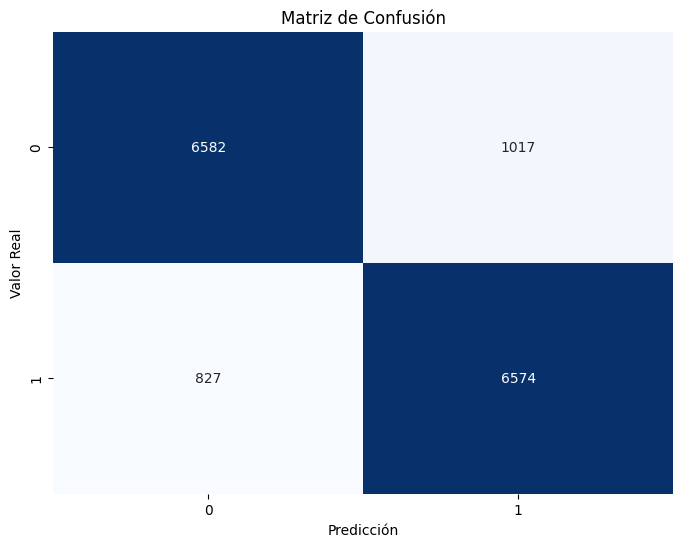

In [ ]:
y_pred_bow = model_bow.predict(x_test)
metricas_y_matriz_confusion(y_pred_bow, y_test)

Accuracy: 0.8528
Recall: 0.8452911768679908
Precision: 0.8547615794507446
f1 score: 0.8499999999999999


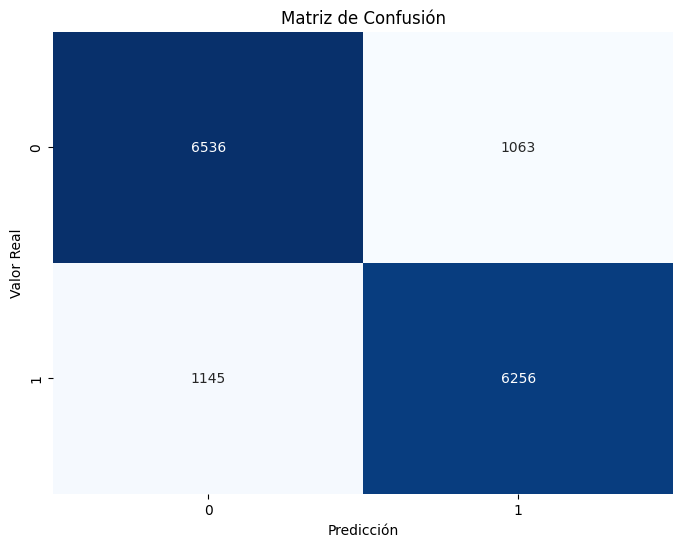

In [ ]:
y_pred_tf = model_tf.predict(x_test)
metricas_y_matriz_confusion(y_pred_tf, y_test)

### **Random Forest**

In [36]:
# Modelo Random Forest con Bag of Words (BoW)
model_rf_bow = make_pipeline(CountVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# Modelo Random Forest con TF-IDF
model_rf_tfidf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

In [37]:
#Hiperparametros a buscar con BoW
param_dist = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'countvectorizer__stop_words': [None],
    'randomforestclassifier__n_estimators': randint(1,8),
}

# Instanciamos con RandomizedSearchCV
random_search = RandomizedSearchCV(
                                    model_rf_bow,
                                    param_distributions=param_dist,
                                    n_iter=3, cv=2,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    random_state=42
                                    )

# Entrenamos el RandomizedSearchCV
random_search.fit(x_train, y_train)

# Obtenemos los mejores parámetros y la mejor puntuación
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Mejores parámetros encontrados:")
print(best_params_random)
print("Mejor puntuación (precisión) en el conjunto de validación cruzada:")
print(best_score_random)

Mejores parámetros encontrados:
{'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': None, 'randomforestclassifier__n_estimators': 7}
Mejor puntuación (precisión) en el conjunto de validación cruzada:
0.7090285714285713


In [ ]:
#Hiperparametros a buscar con TF-IDF
param_dist_tfidf = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__stop_words': [None],
    'randomforestclassifier__n_estimators': randint(1,8),
}

# Instanciamos RandomizedSearchCV para el modelo que utiliza TfidfVectorizer
random_search_tfidf = RandomizedSearchCV(
                                          model_rf_tfidf,
                                          param_distributions=param_dist_tfidf,
                                          n_iter=10,
                                          cv=5,
                                          scoring='accuracy',
                                          n_jobs=-1,
                                          random_state=42
                                          )

# Entrenamos el RandomizedSearchCV para el modelo que utiliza TfidfVectorizer
random_search_tfidf.fit(x_train, y_train)

# Para el modelo TfidfVectorizer
mejores_parametros_tf = random_search_tfidf.best_params_
mejor_puntuacion_tf = random_search_tfidf.best_score_

print("Mejores parámetros para TfidfVectorizer:", mejores_parametros_tf)
print("Mejor puntuación para TfidfVectorizer:", mejor_puntuacion_tf)

Mejores parámetros para CountVectorizer: {'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': None, 'randomforestclassifier__n_estimators': 7}
Mejor puntuación para CountVectorizer: 0.7198
Mejores parámetros para TfidfVectorizer: {'randomforestclassifier__n_estimators': 7, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__stop_words': None}
Mejor puntuación para TfidfVectorizer: 0.7060857142857142


In [38]:
best_estimator_bow = random_search.best_estimator_  # Para el modelo CountVectorizer
best_estimator_bow.fit(x_train, y_train)  # Entrenamos con el mejor clasificador BoW


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=7, random_state=42))])

In [ ]:
best_estimator_tfidf = random_search_tfidf.best_estimator_  # Para el modelo TfidfVectorizer
best_estimator_tfidf.fit(x_train, y_train)  # Entrenamos con el mejor clasificador TfidfVectorizer

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=7, random_state=42))])

Accuracy: 0.7246666666666667
Recall: 0.7254425077692204
Precision: 0.7190304004285523
f1 score: 0.7222222222222221


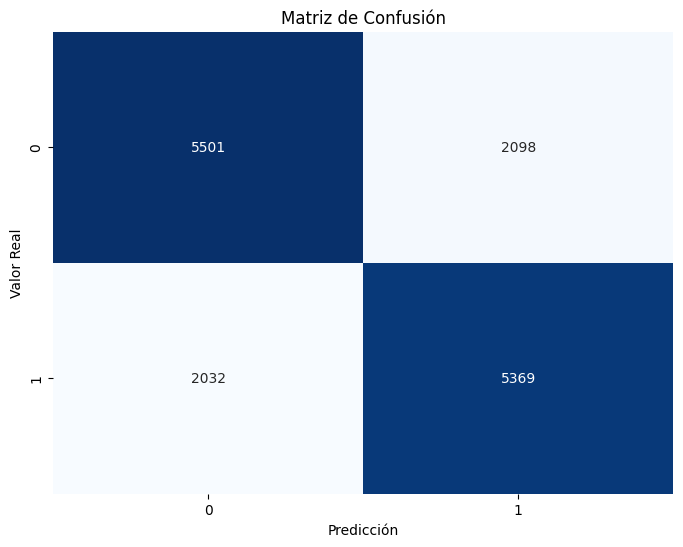

In [ ]:
y_pred_bow = best_estimator_bow.predict(x_test)
metricas_y_matriz_confusion(y_pred_bow, y_test)

Accuracy: 0.7132666666666667
Recall: 0.7009863531955142
Precision: 0.7130291368884002
f1 score: 0.7069564624923349


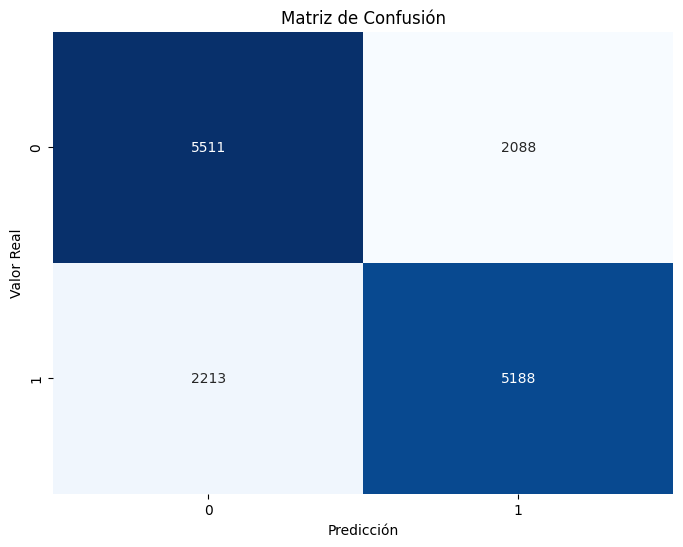

In [ ]:
y_pred_tf = best_estimator_tfidf.predict(x_test)
metricas_y_matriz_confusion(y_pred_tf, y_test)

### **XGBoost 3**

In [20]:
# Codificamos las clases
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Modelo XGBoost con Bag of Words (BoW)
model_xgb_bow = make_pipeline(CountVectorizer(), XGBClassifier(random_state=42))

# Modelo XGBoost con Term Frequency-Inverse Document Frequency (TF-IDF)
model_xgb_tf = make_pipeline(TfidfVectorizer(), XGBClassifier(random_state=42))


In [ ]:
#TF
param_grid_tf = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'xgbclassifier__n_estimators': [50, 100],
    'xgbclassifier__max_depth': [3, 4]
}

search_tf = GridSearchCV(
                        model_xgb_tf,
                        param_grid=param_grid_tf,
                        scoring='accuracy',
                        cv=2,
                        refit=True
                        )

result_tf = search_tf.fit(x_train, y_train_encoded)

best_model_tf = search_tf.best_estimator_

In [ ]:
#BoW
param_dist_bow = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'xgbclassifier__n_estimators': randint(50, 150),
    'xgbclassifier__max_depth': [3, 4]
}

search_bow = RandomizedSearchCV(
    model_xgb_bow,
    param_distributions=param_dist_bow,
    scoring='accuracy',
    cv=2,
    n_iter=3,
    random_state=42
)

search_bow.fit(x_train, y_train_encoded)

In [ ]:
#TF
print("Mejores parámetros encontrados:")
print(result_tf.best_params_)

print("\nMejor puntuación (accuracy) encontrada durante la búsqueda:")
print(result_tf.best_score_)

In [10]:
#BoW
print("Mejores parámetros encontrados:")
print(search_bow.best_params_)

print("\nMejor puntuación (accuracy) encontrada durante la búsqueda:")
print(search_bow.best_score_)

Mejores parámetros encontrados:
{'countvectorizer__ngram_range': (1, 2), 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 149}

Mejor puntuación (accuracy) encontrada durante la búsqueda:
0.843742812804844


In [ ]:
# Para el modelo TfidfVectorizer
mejores_parametros_tf = result_tf.best_params_
model_xgb_tf.set_params(**mejores_parametros_tf)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [11]:
# Para el modelo CounterVectorizer
mejores_parametros_bow = search_bow.best_params_
model_xgb_bow.set_params(**mejores_parametros_bow)


Pipeline(steps=[('countvectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=149, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Entrenamiento con BoW
model_xgb_bow.fit(x_train, y_train_encoded)

In [ ]:
y_pred_tf = model_xgb_tf.predict(x_test)
metricas_y_matriz_confusion(y_pred_tf, y_test)

In [28]:
y_pred_bow = model_xgb_bow.predict(x_test)
mapeo = {0: 'negativo', 1: 'positivo'}

# Aplicamos el mapeo a la prediccion
y_pred_bow_str = [mapeo[pred] for pred in y_pred_bow]

Accuracy: 0.8374
Recall: 0.8579921632211863
Precision: 0.8206254846213492
f1 score: 0.8388929255565096


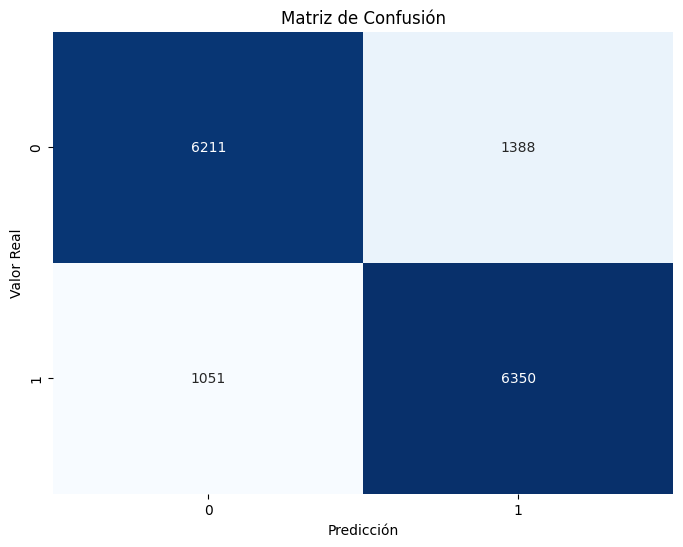

In [30]:
metricas_y_matriz_confusion(y_pred_bow_str, y_test)

### **Red neuronal**

Importamos las librerías de Tensor Flow y Keras necesarias para el armado del modelo de Red Neuronal

Comenzamos a entrenar la red neuronal para nuestro modelo preprocesado con Bag of Words

In [43]:
# Convertimos las etiquetas a valores numéricos (0 o 1)
y_train = y_train.map({'positivo': 1, 'negativo': 0})

# Dividimos los datos de entrenamiento en conjunto de entrenamiento y conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=25)

# Utilizamos CountVectorizer para tokenizar y codificar
max_features = 5000
count_vectorizer = CountVectorizer(max_features=max_features, stop_words='english')
train_bow = count_vectorizer.fit_transform(ds_train['review_es'])
test_bow = count_vectorizer.transform(ds_test['review_es'])

# Dividimos los conjuntos BoW en train y test
x_train_bow, x_test_bow, y_train, y_test = train_test_split(
    train_bow,
    ds_train['sentimiento'],
    test_size=0.3,
    random_state=25
)

# Convertimos las etiquetas a formato numérico
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Nos aseguramos de que los datos estén en el formato adecuado para el modelo secuencial más simple
x_train_bow = tf.convert_to_tensor(x_train_bow.toarray(), dtype=tf.float32)
x_test_bow = tf.convert_to_tensor(x_test_bow.toarray(), dtype=tf.float32)

# Crear un modelo secuencial más simple
model = Sequential([
    Dense(32, activation='relu', input_shape=(max_features,)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(2, activation='sigmoid')
])

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convertimos etiquetas a formato one-hot
y_train_encoded_one_hot = to_categorical(y_train_encoded)

# Entrenamos el modelo
history = model.fit(
    x_train_bow, y_train_encoded_one_hot,
    validation_data=(x_test_bow, to_categorical(label_encoder.transform(y_test))),
    epochs=5,
    batch_size=16
)

print("Forma de X_test_bow:", x_test_bow.shape)
print("Forma de y_test:", to_categorical(label_encoder.transform(y_test)).shape)

# Evaluamos el modelo en el conjunto de prueba
test_results = model.evaluate(x_test_bow, to_categorical(label_encoder.transform(y_test)))

Epoch 1/5
2188/2188 [==============================] - 23s 10ms/step - loss: 0.3821 - accuracy: 0.8350 - val_loss: 0.3201 - val_accuracy: 0.8589
Epoch 2/5
2188/2188 [==============================] - 15s 7ms/step - loss: 0.2746 - accuracy: 0.8881 - val_loss: 0.3100 - val_accuracy: 0.8667
Epoch 3/5
2188/2188 [==============================] - 14s 7ms/step - loss: 0.2319 - accuracy: 0.9041 - val_loss: 0.3144 - val_accuracy: 0.8700
Epoch 4/5
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1960 - accuracy: 0.9211 - val_loss: 0.3517 - val_accuracy: 0.8629
Epoch 5/5
2188/2188 [==============================] - 14s 6ms/step - loss: 0.1637 - accuracy: 0.9371 - val_loss: 0.3828 - val_accuracy: 0.8535
Forma de X_test_bow: (15000, 5000)
Forma de y_test: (15000, 2)
469/469 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8535


469/469 [==============================] - 4s 8ms/step
Accuracy: 0.8534666666666667
Recall: 0.808134035941089
Precision: 0.88489421512058
f1 score: 0.8447740112994351


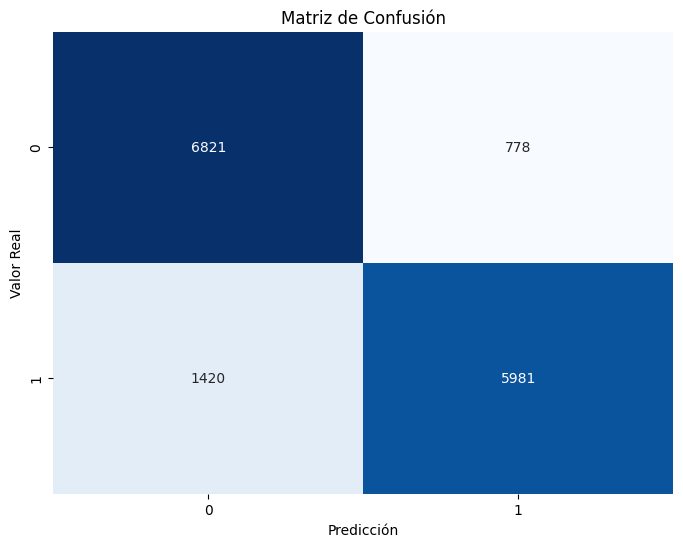

In [49]:
y_prediccion = model.predict(x_test_bow)
y_prediccion_clases = np.argmax(y_prediccion, axis=1)

# Convertimos las clases predichas a etiquetas ('positivo' o 'negativo')
mapeo_clases = {1: 'positivo', 0: 'negativo'}
y_prediccion_etiquetas = np.vectorize(mapeo_clases.get)(y_prediccion_clases)

# Utilizamos la función de evaluación
metricas_y_matriz_confusion(y_prediccion_etiquetas, y_test)

### **Ensamble**

Para el modelo ensamblado, usaremos los modelos de **Bayes Naive**, **Random Forest** y **XGBoost 3**, los 3 con procesado BoW.

**Voting**

Creamos el ensamble a partir de los modelos de Bayes Naive, Random Forest y el XGBoost 3, con el procesamiento BoW.

In [40]:
ensamble_v_bow = VotingClassifier(estimators=[
    ('nb', model_bow),
    ('rf', best_estimator_bow),
    ('xgb', model_xgb_bow)],
    voting='soft')

# Entrenamos el ensamble con el conjunto de entrenamiento
ensamble_v_bow.fit(x_train, y_train)

VotingClassifier(estimators=[('nb',
                              Pipeline(steps=[('countvectorizer',
                                               CountVectorizer(max_df=0.95,
                                                               max_features=800,
                                                               min_df=3)),
                                              ('multinomialnb',
                                               MultinomialNB(alpha=0.43780856901033305,
                                                             class_prior=[0.6,
                                                                          0.4],
                                                             fit_prior=False))])),
                             ('rf',
                              Pipeline(steps=[('countvectorizer',
                                               CountVectorizer()),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(n_estimators=7,...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                 voting='soft')

In [41]:
#Evaluar el rendimiento del ensamble en el conjunto de prueba
y_pred = ensamble_v_bow.predict(x_test)

Accuracy: 0.8220666666666666
Recall: 0.8040805296581544
Precision: 0.8299860529986053
f1 score: 0.8168279459199781


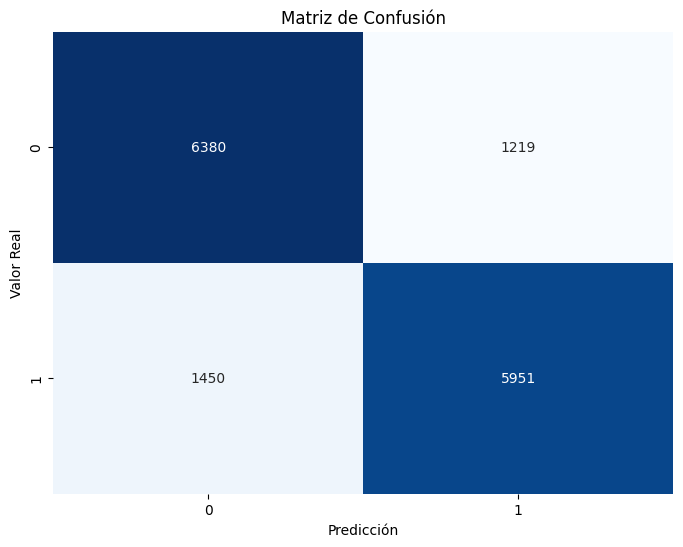

In [42]:
metricas_y_matriz_confusion(y_pred, y_test)

## **Prediccion final**

Seleccionamos el dataset a predecir.

In [ ]:
x_submission = ds_test.review_es

#x_submission_bow = best_model_bow.transform(ds_test.review_es)

##REDES NEURONALES

# Aplicar CountVectorizer a los datos de prueba
#x_submission_bow = count_vectorizer.transform(ds_test_copia['review_es'])

# Asegurarte de que los datos estén en el formato adecuado para el modelo secuencial más simple
#x_submission_bow = tf.convert_to_tensor(x_submission_bow.toarray(), dtype=tf.float32)



Luego de entrenar estos modelos con el dataset de train, vamos a predecir con el test.

In [ ]:
modelo = best_estimator_bow

In [ ]:
y_pred_final = modelo.predict(x_submission)

# Convertir las predicciones de nuevo a las etiquetas originales
#y_pred_final = label_encoder.inverse_transform(y_pred_final)

##REDES NEURONALES

# Hacer predicciones
#y_pred_final = model.predict(x_submission_bow)
#y_pred_final = np.argmax(y_pred_final, axis=1)

#print(len(y_pred_final))
#print(len(ds_test_copia))
#print(ds_test_copia.duplicated().sum())
#print(y_pred_final)



## **Submission**

Haremos la exportacion de esta prediccion para subirla a la competencia de kaggle.

Cargamos el dataset final con las predicciones hechas.


In [ ]:
# Aplanar y_pred_submission
#y_pred_final = y_pred_final.flatten()

# Crear el DataFrame
df_submission = pd.DataFrame({'ID': ds_test_copia['ID'], 'sentimiento': y_pred_final})

##REDES NEURONALES
#df_submission = pd.DataFrame({'ID': ds_test_copia['ID'].reset_index(drop=True), 'sentimiento': y_pred_final})

#df_submission['ID'] = df_submission['ID'].astype(int)

#umbral = 0.5

# Convertir probabilidades a etiquetas binarias
#df_submission['sentimiento'] = (df_submission['sentimiento'] > umbral).astype(int)

# Mapear las etiquetas binarias a 'positivo' o 'negativo'
#df_submission['sentimiento'] = df_submission['sentimiento'].map({1: 'positivo', 0: 'negativo'})

#df_submission.head()

Exportamos.

In [ ]:
df_submission.to_csv('./submission_model_rf_bow.csv', index=False)